In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import matplotlib.pyplot as plt
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import minpy.numpy as np
import load_data
num_val = 10000
num_train = 60000 - num_val
num_test = 10000
batch_size = 128
cifar_path = 'Datasets/cifar-10/'
mnist_path = 'Datasets/mnist/'

def get_data(path,num_train,num_val,num_test):
    x_train,y_train,x_test,y_test = load_data.load_MNIST(path)
    x_val = x_train[num_train:num_train+num_val]
    y_val = y_train[num_train:num_train+num_val]
    y_val = y_val.reshape(y_val.shape[0])
    x_train = x_train[:num_train]
    y_train = y_train[:num_train]
    y_train = y_train.reshape(y_train.shape[0])
    x_test = x_test[:num_test]
    y_test = y_test[:num_test]
    y_test = y_test.reshape(y_test.shape[0])
    return x_train,y_train,x_val,y_val,x_test,y_test
x_train,y_train,x_val,y_val,x_test,y_test = get_data(mnist_path,num_train,num_val,num_test)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

_,H,W = x_train.shape
D = H * W
data = (x_train.reshape(x_train.shape[0],D), y_train, 
        x_val.reshape(x_val.shape[0],D), y_val, 
        x_test.reshape(x_test.shape[0],D), y_test)
# data = (x_train.reshape(x_train.shape[0],D), np.reshape(y_train,(y_train.shape[0], 1)),
#         x_val.reshape(x_val.shape[0],D), np.reshape(y_val, (y_val.shape[0], 1)), 
#         x_test.reshape(x_test.shape[0],D), np.reshape(y_test, (y_test.shape[0], 1)))

I0717 18:33:10 13785 minpy.numpy.random:__init__:30] Initialize module: minpy.numpy.random.
I0717 18:33:10 13785 minpy.numpy.random:__init__:38] Importing from minpy.array_variants.numpy.random.
I0717 18:33:10 13785 minpy.numpy.random:__init__:45] Got 53 primitives from minpy.array_variants.numpy.random
I0717 18:33:10 13785 minpy.numpy.random:__init__:38] Importing from minpy.array_variants.mxnet.random.
I0717 18:33:10 13785 minpy.numpy.random:__init__:45] Got 2 primitives from minpy.array_variants.mxnet.random
I0717 18:33:10 13785 minpy.numpy.random:__init__:50] Import 55 primitives
I0717 18:33:10 13785 minpy.numpy:__init__:30] Initialize module: minpy.numpy.
I0717 18:33:10 13785 minpy.numpy:__init__:38] Importing from minpy.array_variants.numpy.
I0717 18:33:10 13785 minpy.numpy:__init__:45] Got 396 primitives from minpy.array_variants.numpy
I0717 18:33:10 13785 minpy.numpy:__init__:38] Importing from minpy.array_variants.mxnet.
I0717 18:33:10 13785 minpy.numpy:__init__:45] Got 36 pri

train-images-idx3-ubyte.pkl exits
train-labels-idx1-ubyte.pkl exits
t10k-images-idx3-ubyte.pkl exits
t10k-labels-idx1-ubyte.pkl exits
(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)


In [3]:
from constructor import *
from solver import *
import utils

model_name = 'mlp'
act_mode = 'relu'
model_setting = {
#     'model_structure': [784, 256, 64, 10],
    'model_structure': [784, 1024, 1024, 1024, 10],
    'act_mode': [act_mode, act_mode, act_mode],
    'device': 1,
    'weight_init': 0.01,
    'bias_init': 0.1,
    'lower_bound': -1.0,
    'upper_bound': 1.0,
}
model = build_model(model_name, model_setting)

solver_setting = {
    'epoch': 30,
    'batch_size': 50,
    'decay_rate': 0.9,
    'decay_interval': 5,
    'optimizer': 'sgd',
    'update_setting': {'learning_rate': 0.23},
}
solver = Solver(model, data, **solver_setting)
accuracy_record = solver.train()
utils.record_settings('%s-%s' % (model_name, act_mode), model_setting, solver_setting)
print accuracy_record

I0717 18:33:11 13785 minpy.numpy:__getattr__:69] No entry found for "random" in registry, fallback.
I0717 18:33:11 13785 minpy.numpy:__getattr__:69] No entry found for "random" in registry, fallback.
I0717 18:33:11 13785 minpy.numpy:__getattr__:69] No entry found for "random" in registry, fallback.
I0717 18:33:11 13785 minpy.numpy:__getattr__:69] No entry found for "random" in registry, fallback.


epoch 0 batch 0 loss: 2.297732
epoch 0 batch 50 loss: 1.718443
epoch 0 batch 100 loss: 0.987623
epoch 0 batch 150 loss: 0.694262
epoch 0 batch 200 loss: 0.613447
epoch 0 batch 250 loss: 0.989697
epoch 0 batch 300 loss: 0.229101
epoch 0 batch 350 loss: 0.319833
epoch 0 batch 400 loss: 0.391129
epoch 0 batch 450 loss: 0.518931
epoch 0 batch 500 loss: 0.137738
epoch 0 batch 550 loss: 0.286954
epoch 0 batch 600 loss: 0.220890
epoch 0 batch 650 loss: 0.168049
epoch 0 batch 700 loss: 0.036449
epoch 0 batch 750 loss: 0.157692
epoch 0 batch 800 loss: 0.099194
epoch 0 batch 850 loss: 0.435978
epoch 0 batch 900 loss: 0.119452
epoch 0 batch 950 loss: 0.222910
validation accuracy: 0.952200
test accuracy: 0.948100
optimal accuracy: 0.952200
epoch 1 batch 0 loss: 0.213206
epoch 1 batch 50 loss: 0.026979
epoch 1 batch 100 loss: 0.076019
epoch 1 batch 150 loss: 0.211998
epoch 1 batch 200 loss: 0.190202
epoch 1 batch 250 loss: 0.173760
epoch 1 batch 300 loss: 0.106505
epoch 1 batch 350 loss: 0.097763
e

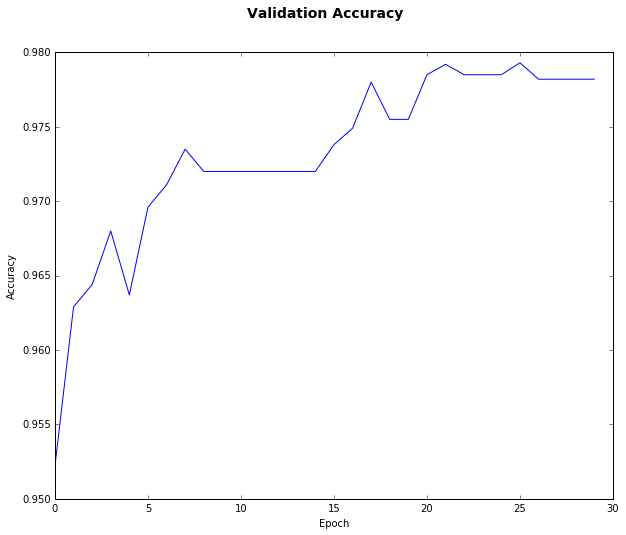

In [4]:
#Validation Accuracy
plt.plot(range(len(accuracy_record)), accuracy_record)
plt.suptitle('Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [5]:
#TODO: Current graphs are epoch-wise sampling from a certain batch in one epoch. Do a full epoch 

print 'Program Over Flag'

Program Over Flag
